In [4]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

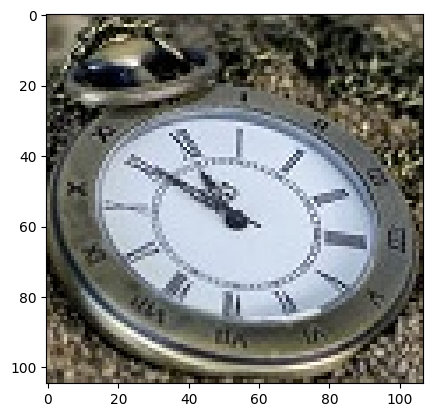

(<matplotlib.image.AxesImage at 0x1e6d9e12f60>, None)

In [5]:
im = Image.open("D:/ĐH/Xử lý ảnh/BTL/images/clock.jpg") # the original small clock image
pylab.imshow(im), pylab.show()

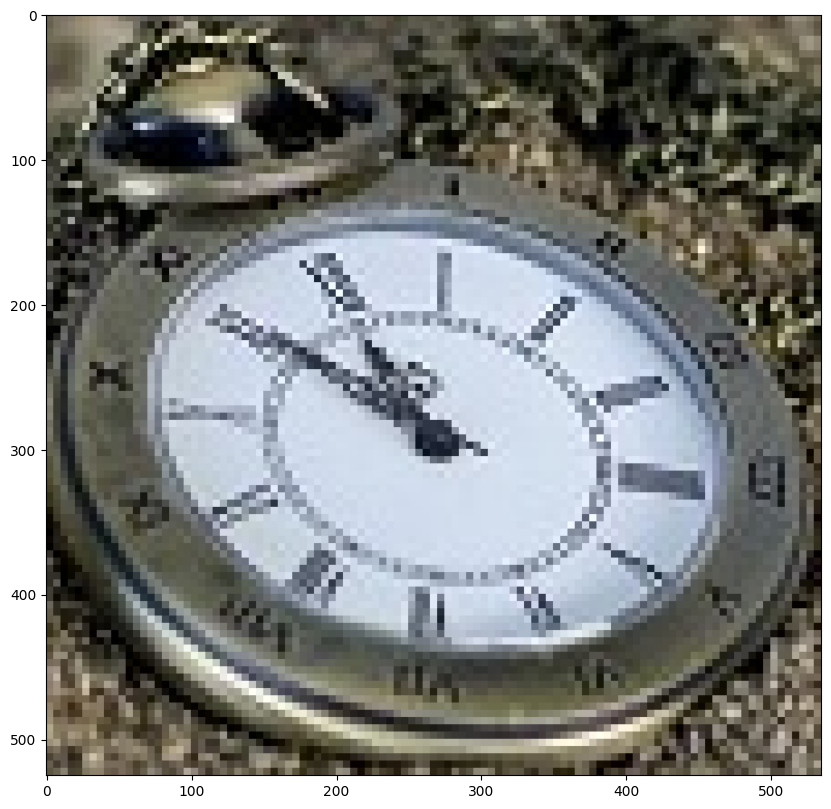

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [6]:
im1 = im.resize((im.width*5, im.height*5), Image.NEAREST) 
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

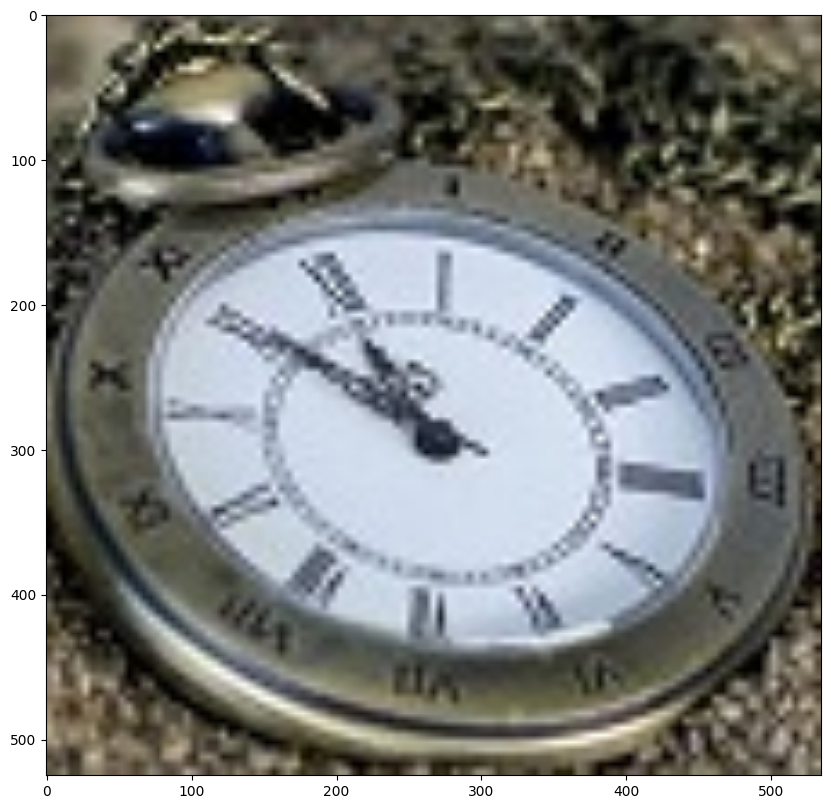

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [7]:
im1 = im.resize((im.width*5, im.height*5), Image.BILINEAR) 
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

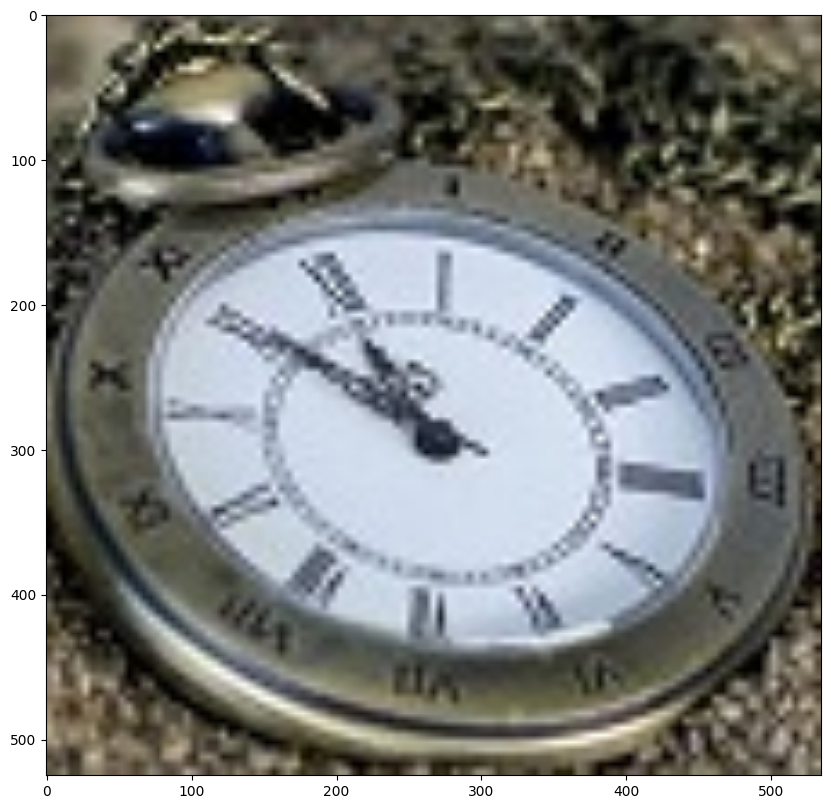

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [8]:
im.resize((im.width*10, im.height*10), Image.BICUBIC).show() 
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

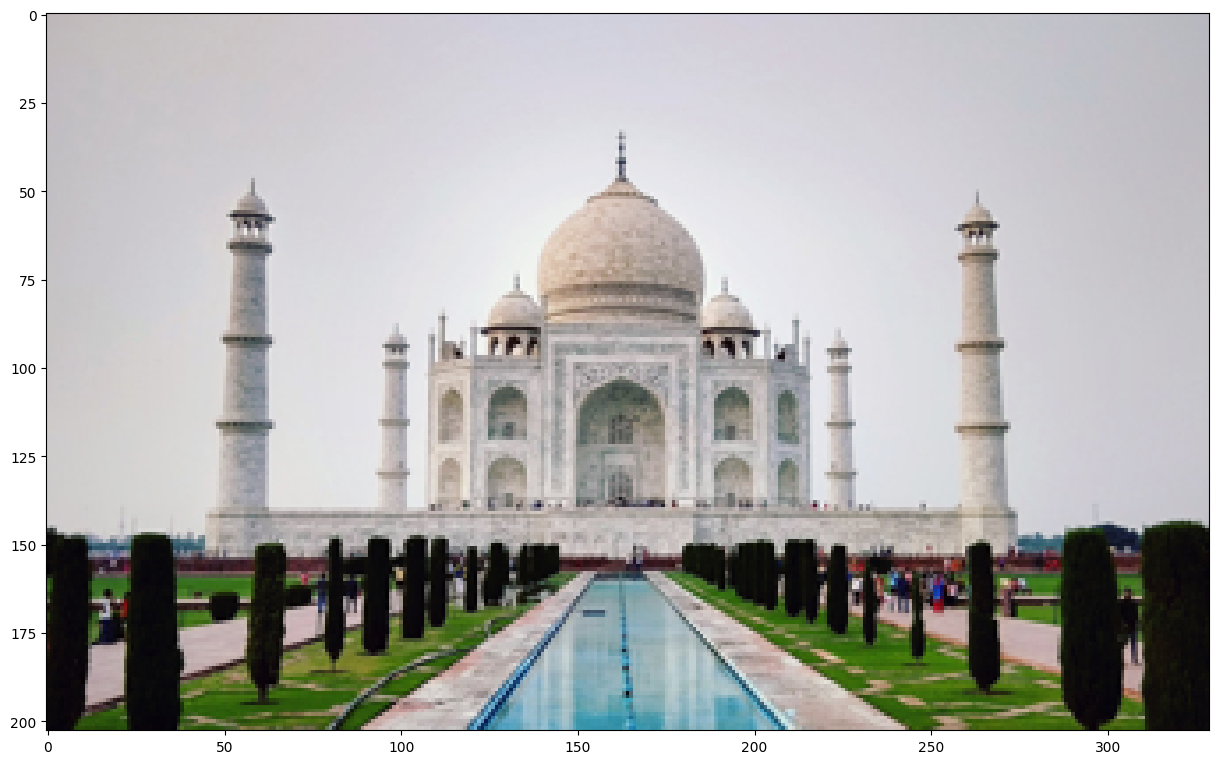

(<Figure size 1500x1000 with 1 Axes>,
 None)

In [9]:
im = Image.open("D:/ĐH/Xử lý ảnh/BTL/images/tajmahal.jpg")
im.show()
im = im.resize((im.width//5, im.height//5))
pylab.figure(figsize=(15,10)), pylab.imshow(im), pylab.show()

In [10]:
im = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)
pylab.figure(figsize=(15,10)), pylab.imshow(im), pylab.show()

AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

TypeError: rescale() got an unexpected keyword argument 'multichannel'

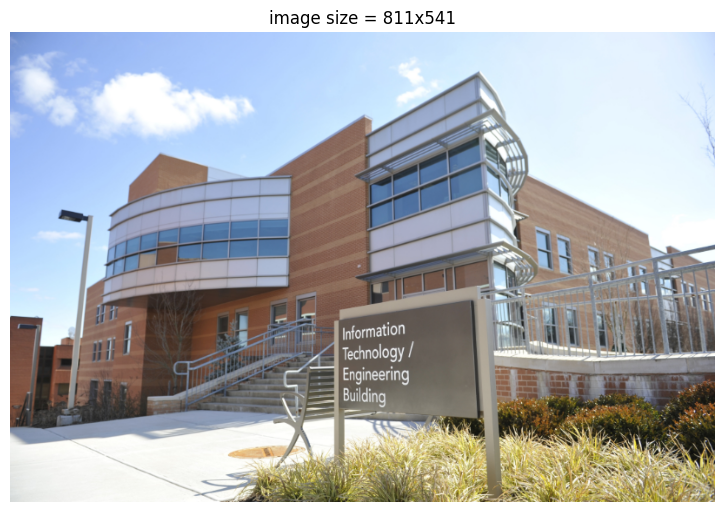

In [12]:
im = imread('D:/ĐH/Xử lý ảnh/BTL/images/umbc.png')
im1 = im.copy()
pylab.figure(figsize=(20,15))
for i in range(4):
    pylab.subplot(2,2,i+1), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('image size = ' + str(im1.shape[1]) + 'x' + str(im1.shape[0]))
    im1 = rescale(im1, scale = 0.5, multichannel=True, anti_aliasing=False)
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

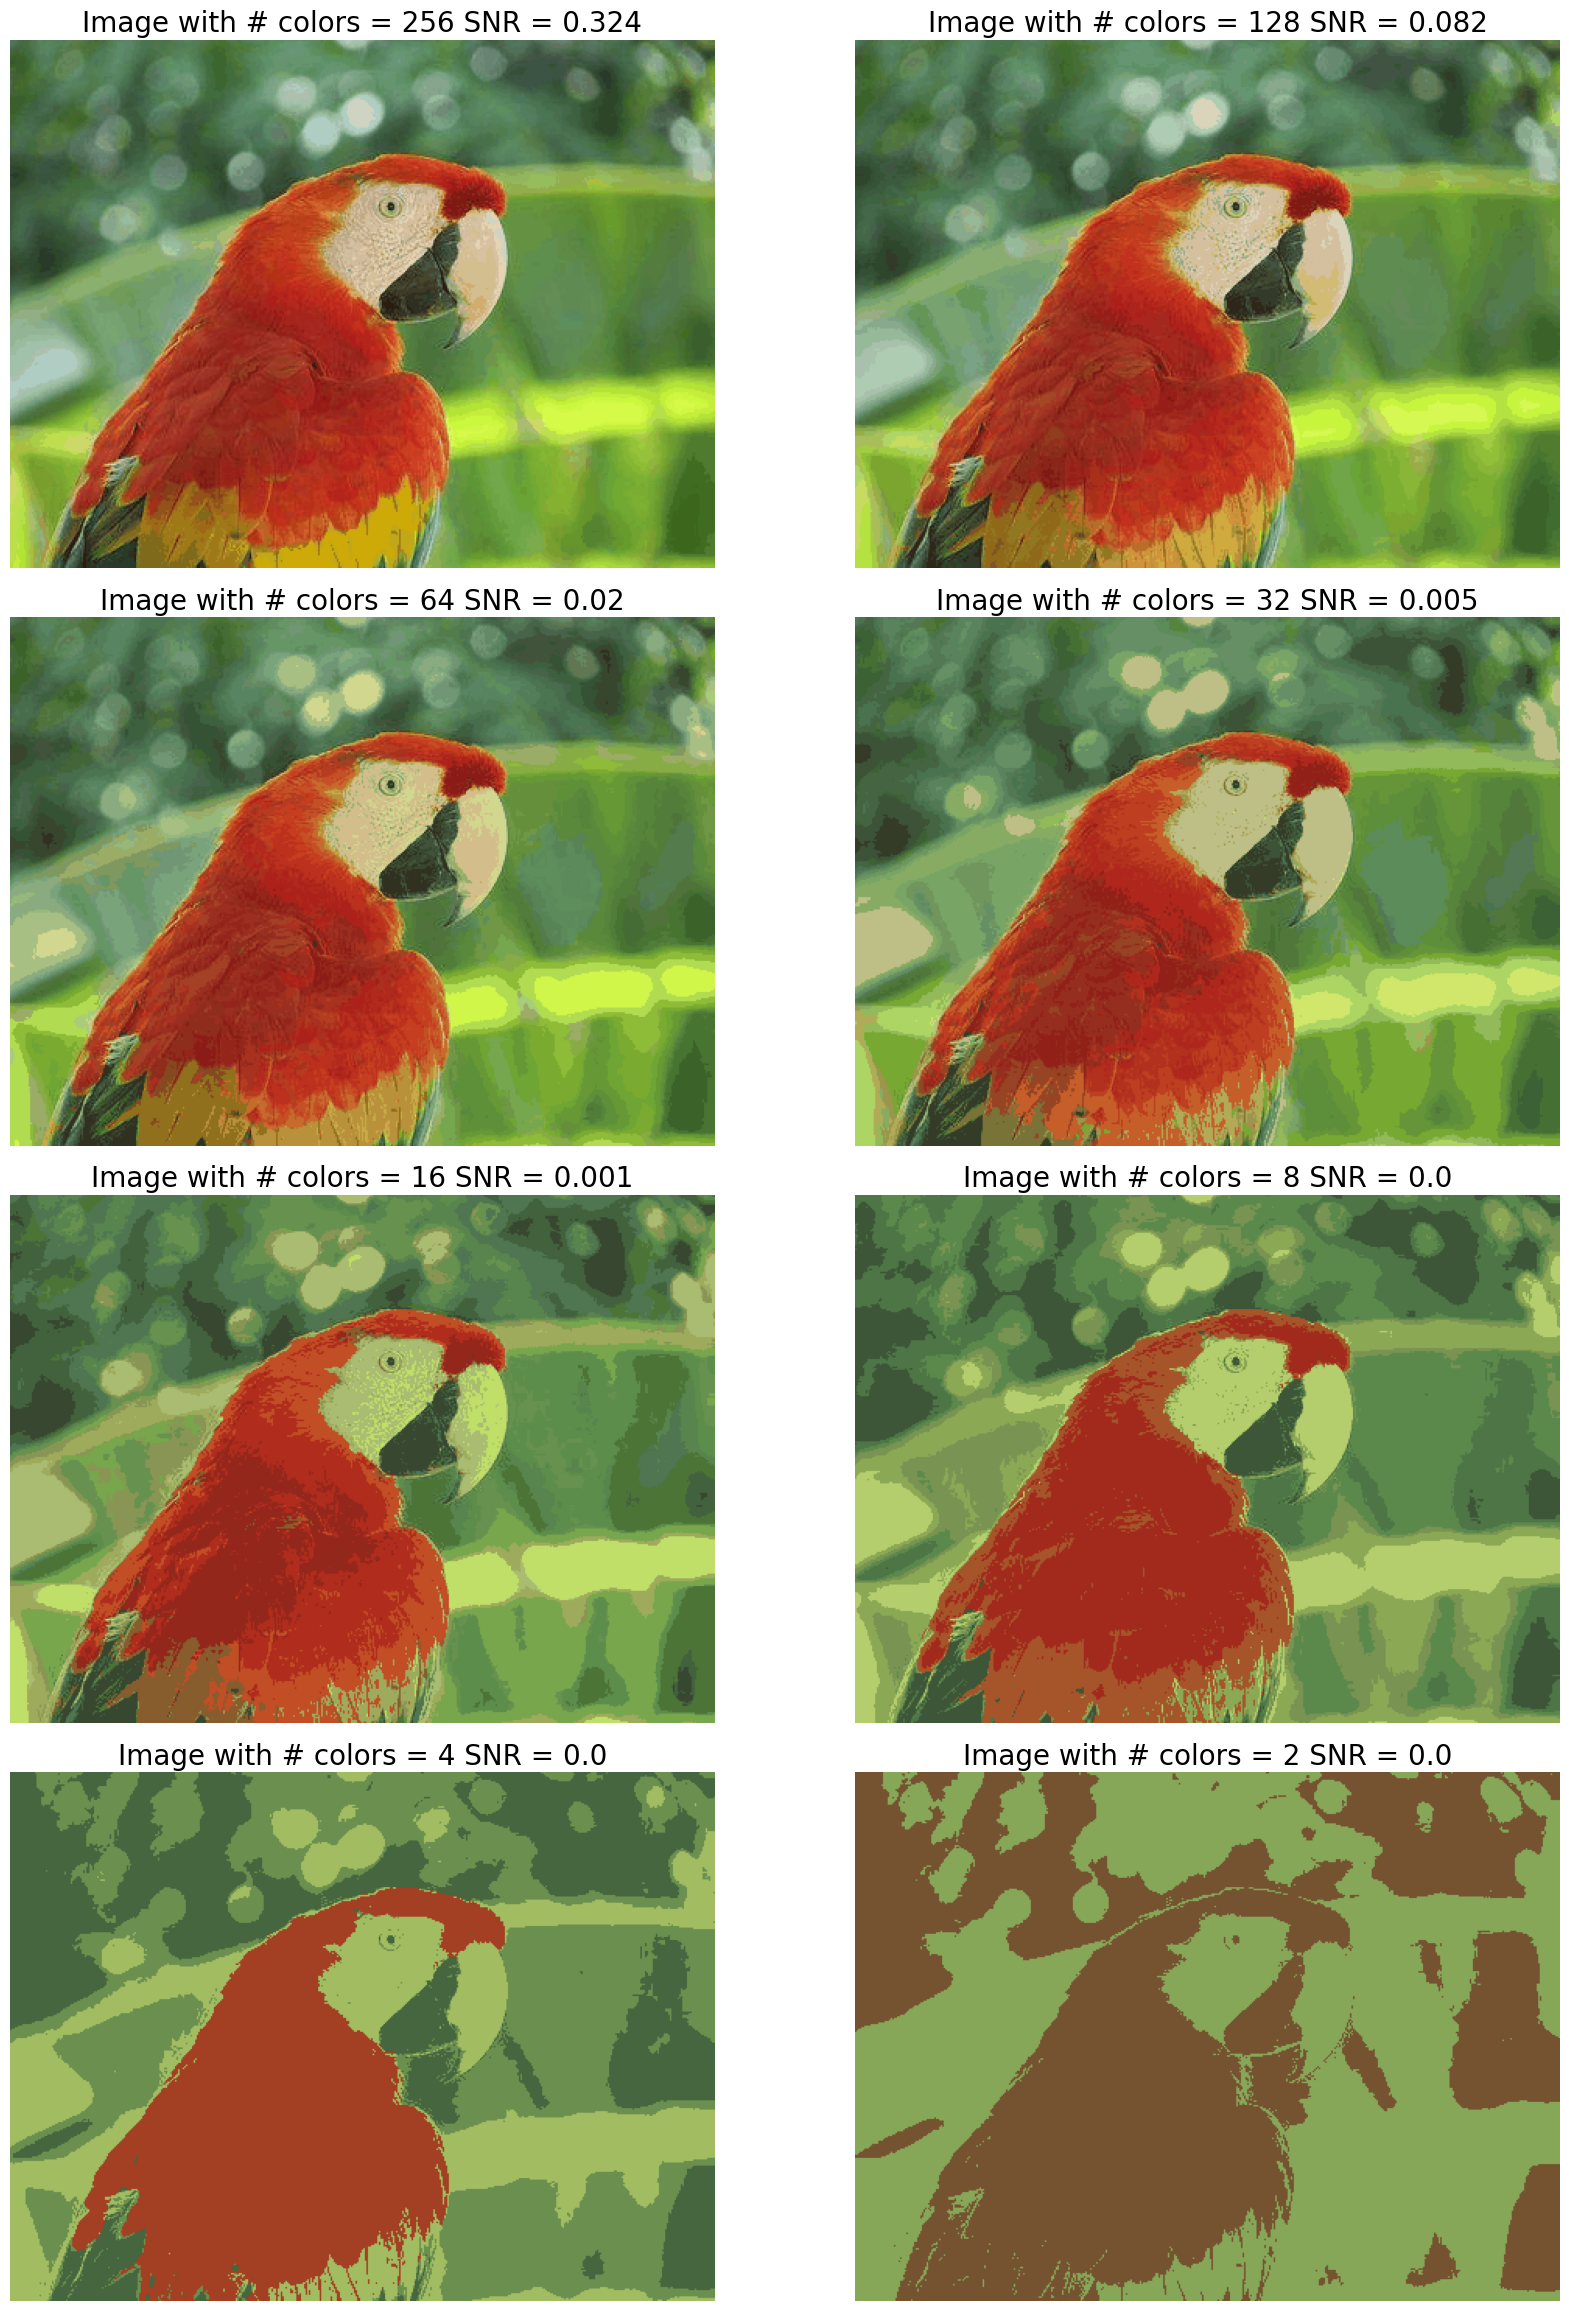

In [14]:
from PIL import Image
import numpy as np
import pylab
from skimage import img_as_float
from skimage.util import random_noise

# Function to calculate Signal-to-Noise Ratio (SNR)
def signal_to_noise(image):
    image = img_as_float(image)
    noise = np.random.normal(0, 1, image.shape)  # Generate random noise
    noisy_image = image + noise
    snr = np.mean(image**2) / np.mean(noise**2)
    return snr

# Load the image
im = Image.open('D:/ĐH/Xử lý ảnh/BTL/images/parrot.jpg')

pylab.figure(figsize=(20,30))

num_colors_list = [1 << n for n in range(8,0,-1)]
snr_list = []
i = 1
for num_colors in num_colors_list:
    # Convert image to palette with a specified number of colors
    im1 = im.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    pylab.subplot(4,2,i), pylab.imshow(im1), pylab.axis('off')
    a
    # Compute SNR using the updated method
    snr = signal_to_noise(im1)
    snr_list.append(snr)
    
    pylab.title(f'Image with # colors = {num_colors} SNR = {np.round(snr, 3)}', size=20)
    i += 1

pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()


TypeError: LogScale.__init__() got an unexpected keyword argument 'basex'

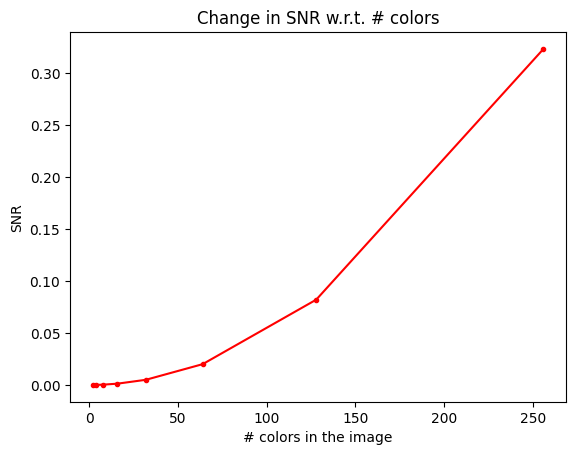

In [15]:
pylab.plot(num_colors_list, snr_list, 'r.-')
pylab.xlabel('# colors in the image')
pylab.ylabel('SNR')
pylab.title('Change in SNR w.r.t. # colors')
pylab.xscale('log', basex=2)
pylab.gca().invert_xaxis()
pylab.show()

SNR for the original image = 0.0345257305676738
SNR for the image obtained after reconstruction = 5.1304056374745


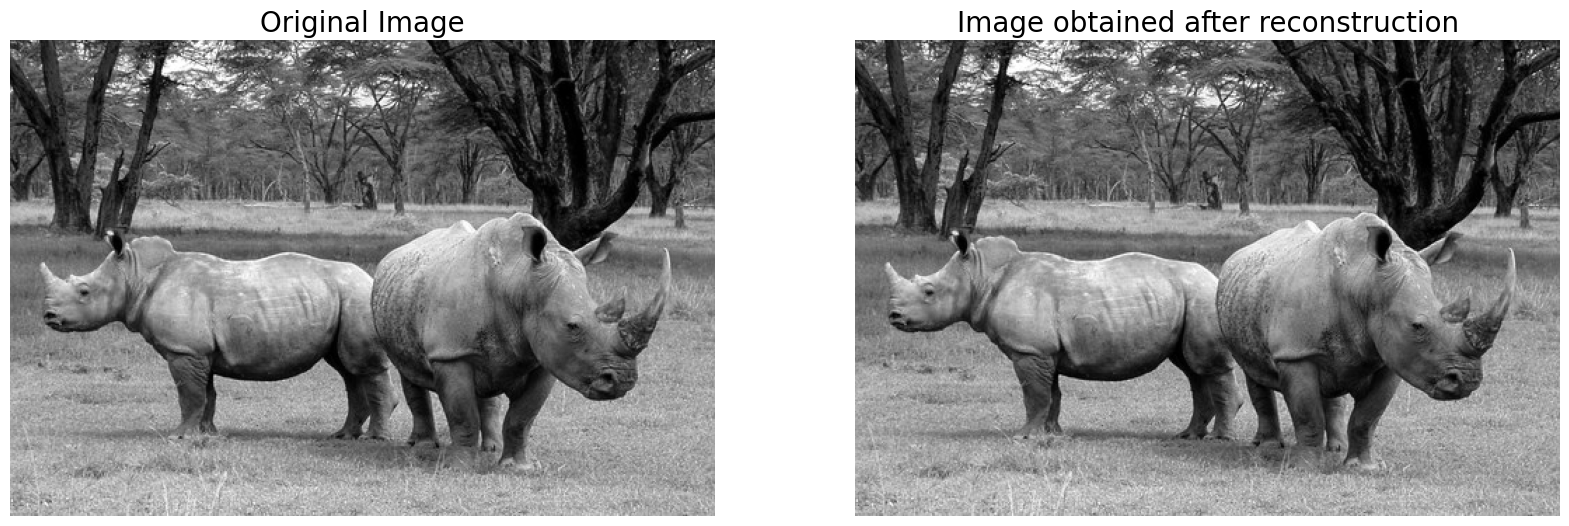

In [18]:

# Tính toán SNR thủ công
def calculate_snr(image):
    signal_power = np.mean(image ** 2)  # Tính công suất tín hiệu
    noise_power = np.mean((image - np.mean(image)) ** 2)  # Tính công suất nhiễu
    snr = signal_power / noise_power
    return snr

# Mở ảnh và chuyển sang grayscale
im = np.array(Image.open('D:/ĐH/Xử lý ảnh/BTL/images/rhino.jpg').convert('L'))

# Tính SNR cho ảnh gốc
snr = calculate_snr(im)
print('SNR for the original image = ' + str(snr))

# Áp dụng FFT và sau đó là IFFT
freq = fp.fft2(im)
im1 = fp.ifft2(freq).real

# Tính SNR cho ảnh sau khi tái tạo
snr_reconstructed = calculate_snr(im1)
print('SNR for the image obtained after reconstruction = ' + str(snr_reconstructed))

# Kiểm tra ảnh gốc và ảnh tái tạo có giống nhau không
assert np.allclose(im, im1)  # Đảm bảo FFT và IFFT gần như giống nhau

# Hiển thị ảnh
pylab.figure(figsize=(20, 10))

# Ảnh gốc
pylab.subplot(121)
pylab.imshow(im, cmap='gray')
pylab.axis('off')
pylab.title('Original Image', size=20)

# Ảnh sau khi tái tạo
pylab.subplot(122)
pylab.imshow(im1, cmap='gray')
pylab.axis('off')
pylab.title('Image obtained after reconstruction', size=20)

# Hiển thị đồ họa
pylab.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19752\2071404519.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  freq2)).astype(int)), pylab.show()


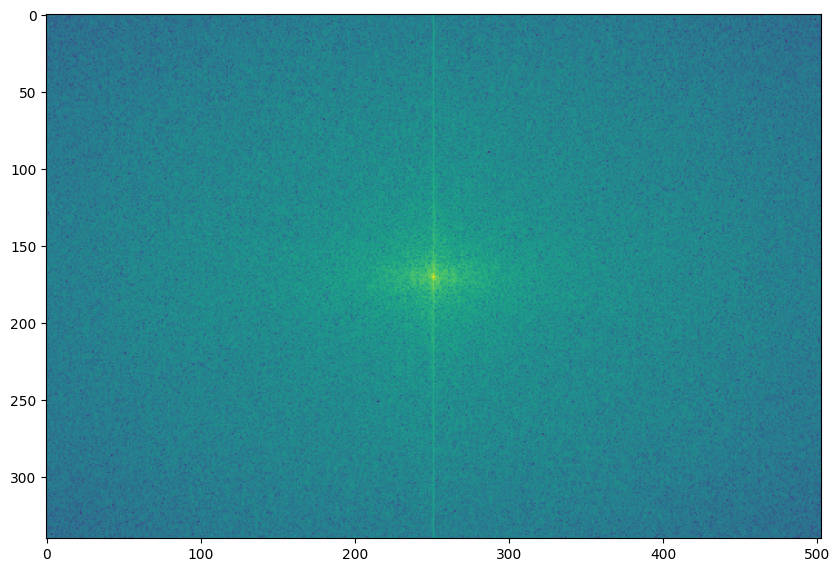

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [19]:
freq2 = fp.fftshift(freq)
pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 +
freq2)).astype(int)), pylab.show()

In [23]:
import numpy.fft as fp
im1 = rgb2gray(imread('D:/ĐH/Xử lý ảnh/BTL/images/house.png'))
pylab.figure(figsize=(12,10))
freq1 = fp.fft2(im1)
im1_ = fp.ifft2(freq1).real
pylab.subplot(2,2,1), pylab.imshow(im1, cmap='gray'), pylab.title('Original Image', size=20)
pylab.subplot(2,2,2), pylab.imshow(20*np.log10( 0.01 + np.abs(fp.fftshift(freq1))), cmap='gray')
pylab.title('FFT Spectrum Magnitude', size=20)
pylab.subplot(2,2,3), pylab.imshow(np.angle(fp.fftshift(freq1)),cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.subplot(2,2,4), pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

ValueError: the input array must have size 3 along `channel_axis`, got (340, 510, 4)

In [26]:
im2 = rgb2gray(imread('D:/ĐH/Xử lý ảnh/BTL/images/house2.png'))
pylab.figure(figsize=(12,10))
freq2 = fp.fft2(im2)
im2_ = fp.ifft2(freq2).real
pylab.subplot(2,2,1), pylab.imshow(im2, cmap='gray'), pylab.title('Original Image', size=20)
pylab.subplot(2,2,2), pylab.imshow(20*np.log10( 0.01 +
np.abs(fp.fftshift(freq2))), cmap='gray')
pylab.title('FFT Spectrum Magnitude', size=20)
pylab.subplot(2,2,3), pylab.imshow(np.angle(fp.fftshift(freq2)),
cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.subplot(2,2,4), pylab.imshow(np.clip(im2_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

ValueError: the input array must have size 3 along `channel_axis`, got (340, 510, 4)

In [27]:
pylab.figure(figsize=(20,15))
im1_ = fp.ifft2(np.vectorize(complex)(freq1.real, freq2.imag)).real
im2_ = fp.ifft2(np.vectorize(complex)(freq2.real, freq1.imag)).real
pylab.subplot(211), pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image (Re(F1) + Im(F2))', size=20)
pylab.subplot(212), pylab.imshow(np.clip(im2_,0,255), cmap='gray')
pylab.title('Reconstructed Image (Re(F2) + Im(F1))', size=20)
pylab.show()

NameError: name 'freq1' is not defined

<Figure size 2000x1500 with 0 Axes>

0.9921568627450982
(256, 256)


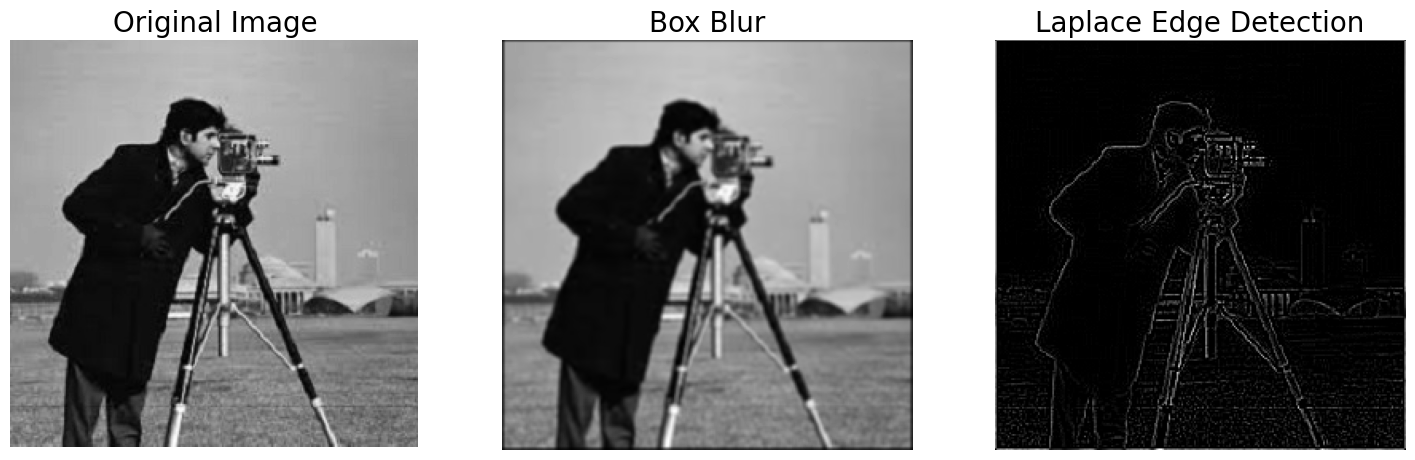

In [30]:
im = rgb2gray(imread('D:/ĐH/Xử lý ảnh/BTL/images/cameraman.jpg')).astype(float)
print(np.max(im))
print(im.shape)
blur_box_kernel = np.ones((3,3)) / 9
edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
im_blurred = signal.convolve2d(im, blur_box_kernel)
im_edges = np.clip(signal.convolve2d(im, edge_laplace_kernel), 0, 1)
fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(18,6))
axes[0].imshow(im, cmap=pylab.cm.gray)
axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_blurred, cmap=pylab.cm.gray)
axes[1].set_title('Box Blur', size=20)
axes[2].imshow(im_edges, cmap=pylab.cm.gray)
axes[2].set_title('Laplace Edge Detection', size=20)
for ax in axes:
    ax.axis('off')
pylab.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19752\196940269.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face_image = misc.face(gray=True) - misc.face(gray=True).mean()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19752\196940269.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


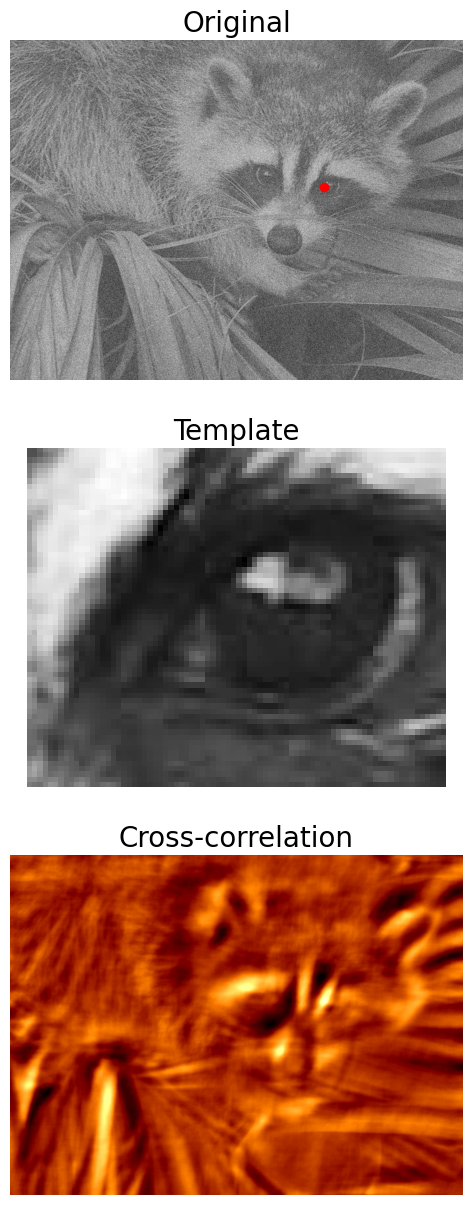

In [32]:
face_image = misc.face(gray=True) - misc.face(gray=True).mean()
template_image = np.copy(face_image[300:365, 670:750])
template_image -= template_image.mean()
face_image = face_image + np.random.randn(*face_image.shape) * 50 
correlation = signal.correlate2d(face_image, template_image,
boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(correlation), correlation.shape) 
fig, (ax_original, ax_template, ax_correlation) = pylab.subplots(3, 1, figsize=(6, 15))
ax_original.imshow(face_image, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()
ax_template.imshow(template_image, cmap='gray')
ax_template.set_title('Template', size=20)
ax_template.set_axis_off()
ax_correlation.imshow(correlation, cmap='afmhot')
ax_correlation.set_title('Cross-correlation', size=20)
ax_correlation.set_axis_off()
ax_original.plot(x, y, 'ro')
fig.show()